In [41]:
#Imports
import numpy as np
import pandas as pd
from os.path import join
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning import loggers as pl_loggers

import pytorch_lightning as pl
from pytorch_lightning import Trainer, seed_everything, LightningModule
from pytorch_lightning.callbacks import ModelCheckpoint

from transformers import BertModel
from utils.data import RelevantDataset
import importlib

#Notebook Parameters
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
    
bert_id = "google/bert_uncased_L-2_H-128_A-2"

noetbook_datetime = datetime.now()

seed_everything(1337)

Global seed set to 1337


1337

In [2]:
train_ds = RelevantDataset(dataset="train", target_mode="isrelevant", device=device)

In [21]:
import sklearn
import sklearn.tree
import sklearn.metrics
#from sklearn.tree import DesicionTreeClassifier

In [12]:
X_without_bert = np.delete(train_ds.X,2,axis=-1)
Y= train_ds.Y

0.8642344292143324
0.5889027883475646


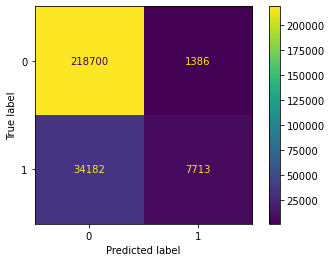

In [30]:
tree = sklearn.tree.DecisionTreeClassifier(criterion = "gini", max_depth=5)
tree.fit(X_without_bert, Y)
print(sklearn.metrics.accuracy_score( Y, tree.predict(X_without_bert)))
print(sklearn.metrics.balanced_accuracy_score( Y, tree.predict(X_without_bert)))
sklearn.metrics.plot_confusion_matrix(tree, X_without_bert, Y)

0.6763620262538123
0.7384144580997841


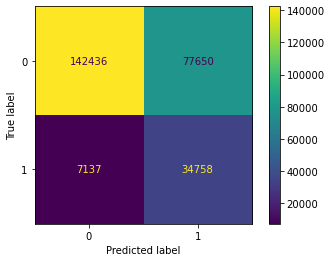

In [32]:
tree = sklearn.tree.DecisionTreeClassifier(criterion = "gini", max_depth=5 , class_weight = {1: 1-train_ds.prior, 0:train_ds.prior})
tree.fit(X_without_bert, Y)
print(sklearn.metrics.accuracy_score(Y, tree.predict(X_without_bert)))
print(sklearn.metrics.balanced_accuracy_score( Y, tree.predict(X_without_bert)))
sklearn.metrics.plot_confusion_matrix(tree, X_without_bert, Y)

In [38]:
tree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': {1: 0.840083822872651, 0: 0.15991617712734893},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

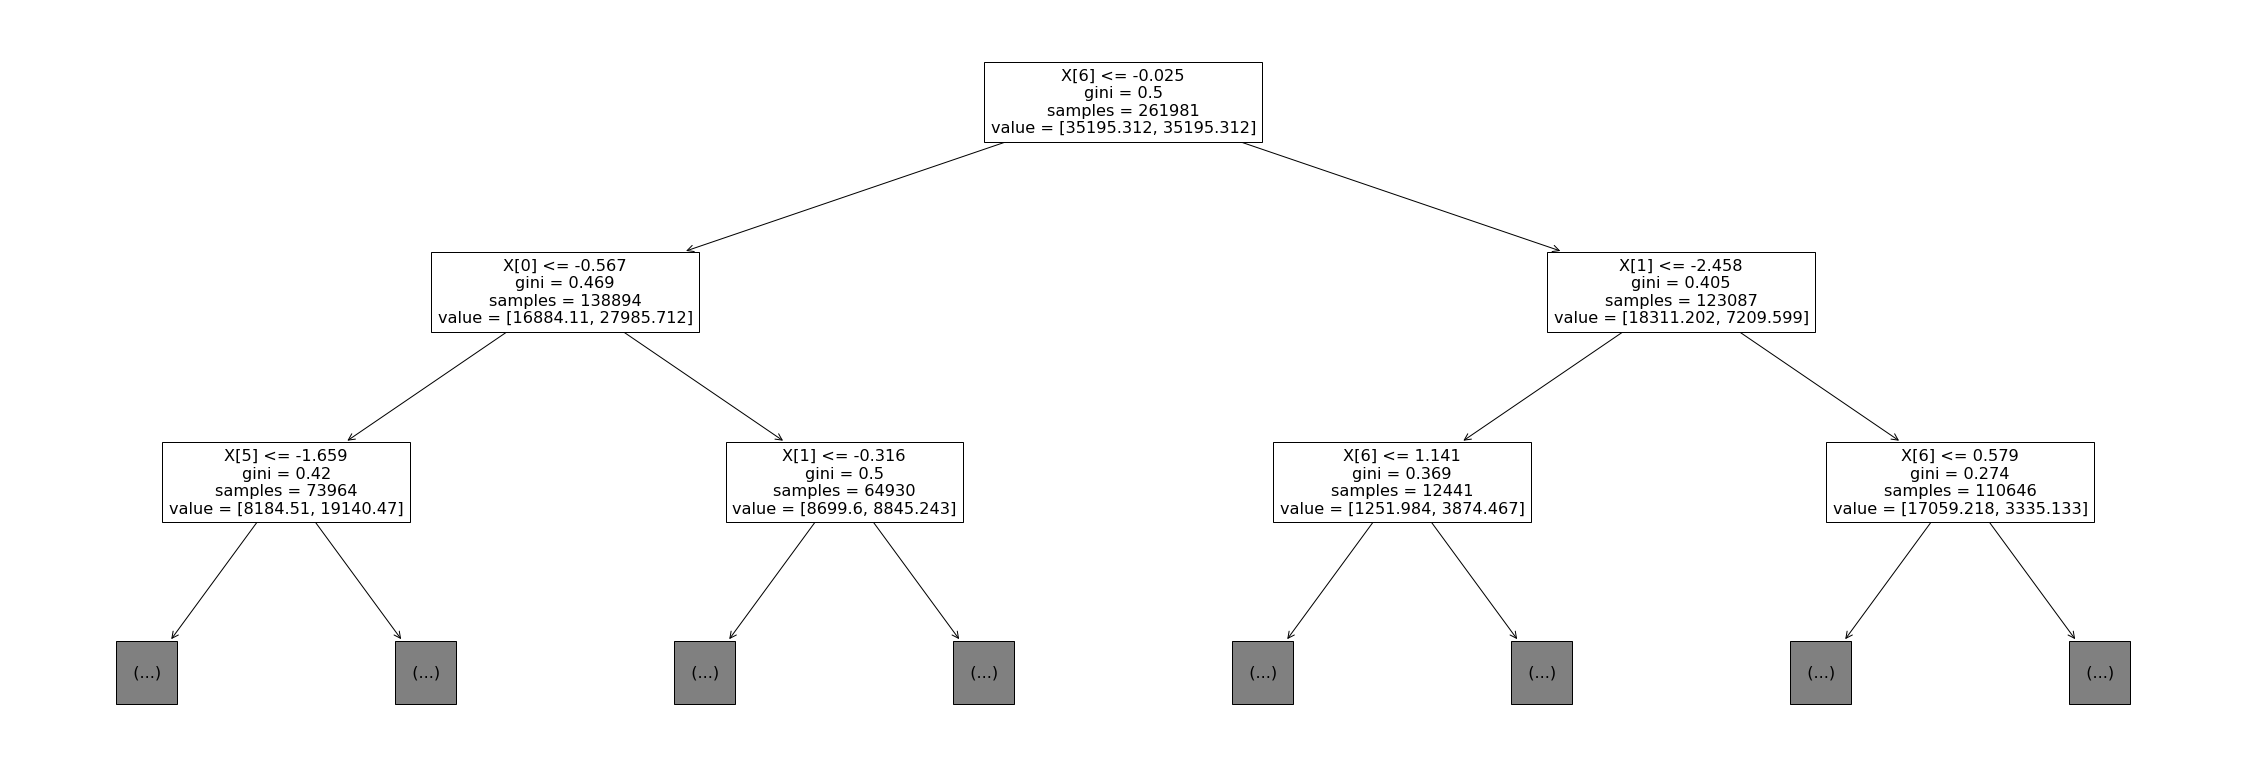

In [49]:
plt.subplots(figsize=(40,14))
sklearn.tree.plot_tree(tree, max_depth=2)
plt.show()

0:"sentence_position"
1:"sentence_length"
2:"project_name"
3:"country_code"
4:"url"
5:"text_length"
6:"sentence_count"
7:"bert_sum"
8:"is_relevant"]